# Pre Processing the Data set
In this page we shall get the data and pre process them in preparation in creating the app and learn how to distinguish a healthy leaves and a leaves that has mildew. 
The following are the steps:

## 1.Installing Kaggle

In [1]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 22.6 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=bcaa19bf1f75ee155bcd35ff48da687307a34734dc46ce42b058c4521146a8b5
  Stored in directory: /home/gitpod/.cache/pip/wheels/a0/87/83/f9893bb1660a03ca5808b7429e77808120f091569651323dd1
Successfully built kaggle


## 2. Downloading kaggle dataset

In [30]:
!kaggle datasets download -d codeinstitute/cherry-leaves

Dataset URL: https://www.kaggle.com/datasets/codeinstitute/cherry-leaves
License(s): unknown
cherry-leaves.zip: Skipping, found more recently modified local copy (use --force to force download)


## 3.Unzipping the file

In [29]:
import zipfile

with zipfile.ZipFile("cherry-leaves.zip", "r") as zip_ref:
    zip_ref.extractall("cherry-leaves")

# DATA CLEANING
## Check and remove data that are not images

In [32]:
import os
import shutil

def remove_non_image_file(my_data_dir):
    image_extensions = ('.png', '.jpg', '.jpeg')
    for folder in os.listdir(my_data_dir):
        folder_path = os.path.join(my_data_dir, folder)
        if os.path.isdir(folder_path):
            non_image_count = 0
            for filename in os.listdir(folder_path):
                file_path = os.path.join(folder_path, filename)
                if not filename.lower().endswith(image_extensions):
                    if os.path.isfile(file_path):
                        os.remove(file_path) # Remove non-image file
                    else:
                        shutil.rmtree(file_path) # Remove directory
                    non_image_count += 1
            print(f"Folder: {folder} - has non-image files: {non_image_count}")

# Call the function with the directory path
remove_non_image_file(my_data_dir='./resized_data')


Folder: healthy - has non-image files: 0
Folder: powdery_mildew - has non-image files: 0


## 1. Resizing the image files

In [31]:
from PIL import Image
import os

# Define directory paths
dataset_dirs = ["./cherry-leaves/cherry-leaves/healthy", "./cherry-leaves/cherry-leaves/powdery_mildew"]
output_dir = "./resized_data"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to resize images and save them
def resize_and_save_image(image_path, output_path, new_size=(100, 100)):
    # Load image
    image = Image.open(image_path)
    
    # Resize image
    resized_image = image.resize(new_size)
    
    # Save resized image
    resized_image.save(output_path)

# Iterate through dataset directories
for dataset_dir in dataset_dirs:
    # Get category name from directory
    category = os.path.basename(dataset_dir)
    
    # Output directory for the current category
    output_category_dir = os.path.join(output_dir, category)
    os.makedirs(output_category_dir, exist_ok=True)
    
    # Iterate through files in the dataset directory
    for file in os.listdir(dataset_dir):
        if file.lower().endswith((".jpeg", ".jpg")):
            # Input and output paths
            input_path = os.path.join(dataset_dir, file)
            output_path = os.path.join(output_category_dir, file)
            
            # Resize image and save
            resize_and_save_image(input_path, output_path)


## 4. Calculate mean and standard deviation of a set of images. Summarize the  statisticaö analysis of the data set.

In [4]:
!pip install opencv-python


In [2]:
!sudo apt-get install libgl1-mesa-glx


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libgl1-mesa-glx


In [3]:
!pip install opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 53.9 MB/s eta 0:00:00:00:0100:01


Summary:
Healthy Leaves - Mean: [138.65523108 144.69453251 121.62613779]  Standard Deviation: [52.81307405 35.16307886 53.32607702]
Powdery Mildew Leaves - Mean: [116.11770442 123.17088945 103.77318313]  Standard Deviation: [36.91997604 34.15072728 42.99333244]


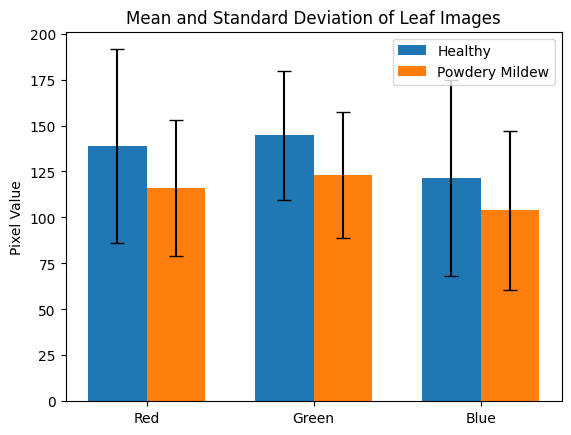

In [33]:
import os
os.environ['LD_LIBRARY_PATH'] = '/path/to/libGL.so.1:' + os.environ.get('LD_LIBRARY_PATH', '')
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to calculate mean and standard deviation of a set of images
def calculate_stats(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        images.append(img)
    images = np.array(images)
    mean = np.mean(images, axis=(0, 1, 2))
    std = np.std(images, axis=(0, 1, 2))
    return mean, std

# Paths to folders containing images
healthy_folder = 'resized_data/healthy'
mildew_folder = 'resized_data/powdery_mildew'

# Calculate statistics for healthy leaves
healthy_mean, healthy_std = calculate_stats(healthy_folder)

# Calculate statistics for powdery mildew leaves
mildew_mean, mildew_std = calculate_stats(mildew_folder)

# Plotting
labels = ['Red', 'Green', 'Blue']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, healthy_mean, width, label='Healthy', yerr=healthy_std, capsize=5)
rects2 = ax.bar(x + width/2, mildew_mean, width, label='Powdery Mildew', yerr=mildew_std, capsize=5)

ax.set_ylabel('Pixel Value')
ax.set_title('Mean and Standard Deviation of Leaf Images')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Print summary
print("Summary:")
print("Healthy Leaves - Mean:", healthy_mean, " Standard Deviation:", healthy_std)
print("Powdery Mildew Leaves - Mean:", mildew_mean, " Standard Deviation:", mildew_std)

plt.show()



## 5. Scatter Plot Matrix. To see the relationships between key features (e.g., size, color intensity) for both healthy and diseased cherry leaves.


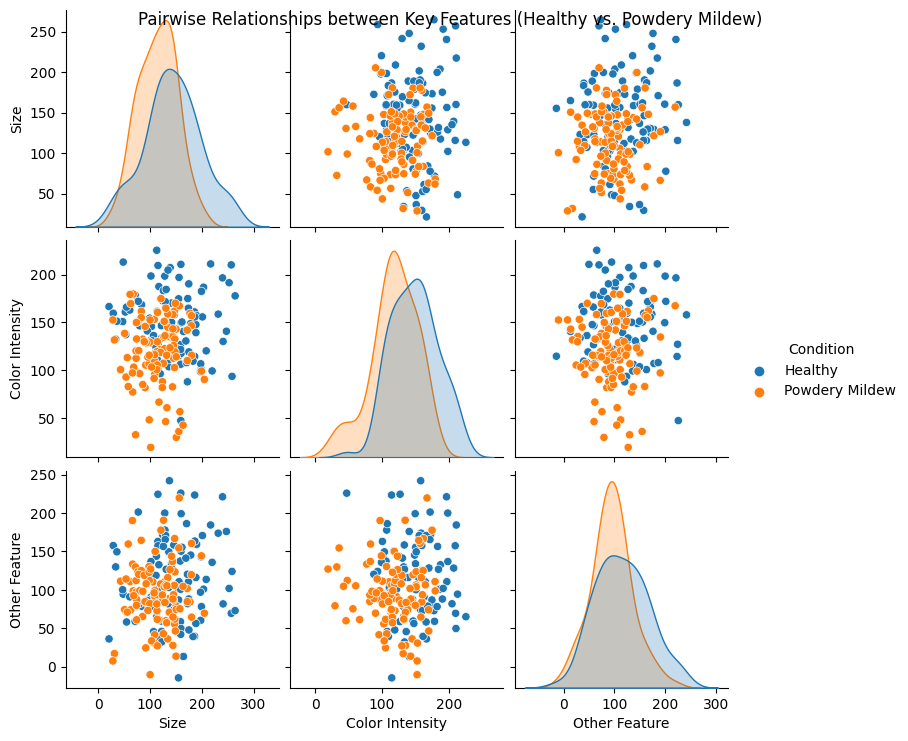

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Summary statistics
healthy_mean = np.array([138.65523108, 144.69453251, 121.62613779])
healthy_std = np.array([52.81307405, 35.16307886, 53.32607702])

mildew_mean = np.array([116.11770442, 123.17088945, 103.77318313])
mildew_std = np.array([36.91997604, 34.15072728, 42.99333244])

# Create synthetic data based on normal distribution
np.random.seed(0)
n_samples = 100
healthy_data = np.random.normal(loc=healthy_mean, scale=healthy_std, size=(n_samples, 3))
mildew_data = np.random.normal(loc=mildew_mean, scale=mildew_std, size=(n_samples, 3))

# Create DataFrame
df = pd.DataFrame(np.concatenate([healthy_data, mildew_data]),
                  columns=['Size', 'Color Intensity', 'Other Feature'])
df['Condition'] = ['Healthy'] * n_samples + ['Powdery Mildew'] * n_samples

# Interactive scatter plot matrix
sns.pairplot(df, hue='Condition')
plt.suptitle('Pairwise Relationships between Key Features (Healthy vs. Powdery Mildew)')
plt.show()


## 5. histograms overlaid with density plots. To compare between healthy and diseased leaves

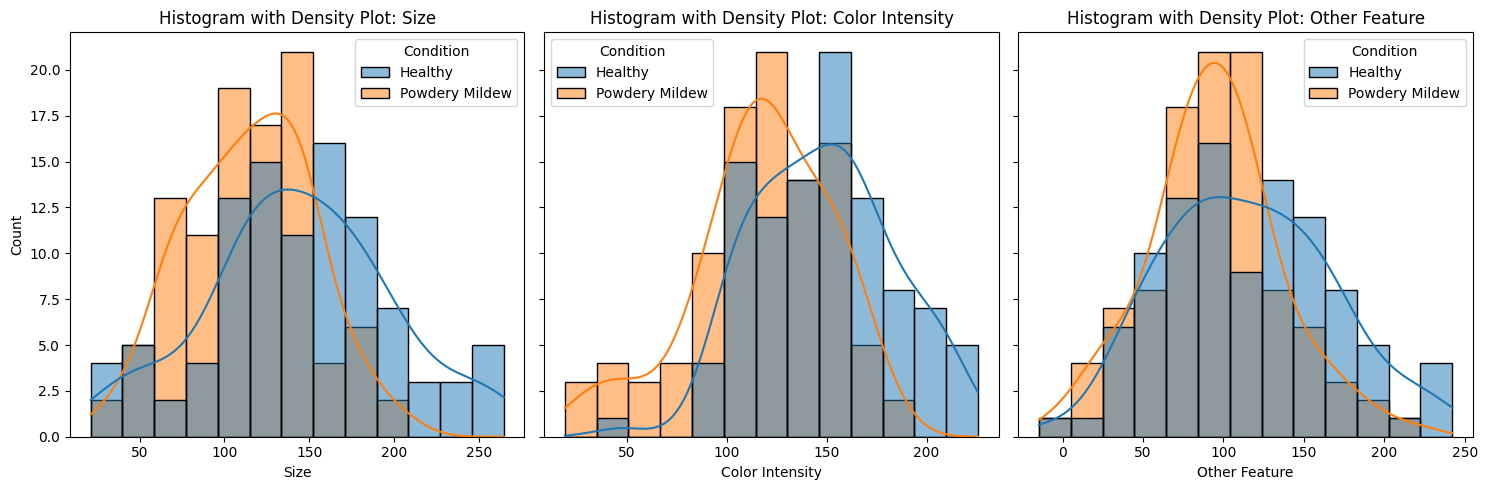

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Summary statistics
healthy_mean = np.array([138.65523108, 144.69453251, 121.62613779])
healthy_std = np.array([52.81307405, 35.16307886, 53.32607702])

mildew_mean = np.array([116.11770442, 123.17088945, 103.77318313])
mildew_std = np.array([36.91997604, 34.15072728, 42.99333244])

# Generate synthetic data based on normal distribution
np.random.seed(0)
n_samples = 100
healthy_data = np.random.normal(loc=healthy_mean, scale=healthy_std, size=(n_samples, 3))
mildew_data = np.random.normal(loc=mildew_mean, scale=mildew_std, size=(n_samples, 3))

# Create DataFrame
df = pd.DataFrame(np.concatenate([healthy_data, mildew_data]),
                  columns=['Size', 'Color Intensity', 'Other Feature'])
df['Condition'] = ['Healthy'] * n_samples + ['Powdery Mildew'] * n_samples

# Histograms overlaid with density plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, feature in enumerate(['Size', 'Color Intensity', 'Other Feature']):
    sns.histplot(data=df, x=feature, hue='Condition', kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with Density Plot: {feature}')
plt.tight_layout()
plt.show()


# Split train validation test set. 

In [37]:
import os
import shutil
import random

def split_train_validation_test_images(my_data_dir, output_dir, train_set_ratio, validation_set_ratio, test_set_ratio):
    if train_set_ratio + validation_set_ratio + test_set_ratio != 1.0:
        print("train_set_ratio + validation_set_ratio + test_set_ratio should sum 1.0")
        return

    # Get class labels
    labels = os.listdir(my_data_dir)
    if 'test' in labels:
        pass
    else: 
        # Create train, validation, and test folders with class labels sub-folders in the output directory
        for folder in ['train', 'validation', 'test']:
            for label in labels:
                os.makedirs(name=os.path.join(output_dir, folder, label))

        for label in labels:
            files = os.listdir(os.path.join(my_data_dir, label))
            random.shuffle(files)

            train_set_files_qty = int(len(files) * train_set_ratio)
            validation_set_files_qty = int(len(files) * validation_set_ratio)

            count = 1
            for file_name in files:
                if count <= train_set_files_qty:
                    # Move given file to train set
                    shutil.move(os.path.join(my_data_dir, label, file_name),
                                os.path.join(output_dir, 'train', label, file_name))
                elif count <= (train_set_files_qty + validation_set_files_qty):
                    # Move given file to validation set
                    shutil.move(os.path.join(my_data_dir, label, file_name),
                                os.path.join(output_dir, 'validation', label, file_name))
                else:
                    # Move given file to test set
                    shutil.move(os.path.join(my_data_dir, label, file_name),
                                os.path.join(output_dir, 'test', label, file_name))
                count += 1

            os.rmdir(os.path.join(my_data_dir, label))

# Example usage
split_train_validation_test_images(my_data_dir="./resized_data",
                                    output_dir="./validation_data",
                                    train_set_ratio=0.7,
                                    validation_set_ratio=0.1,
                                    test_set_ratio=0.2)


## 6. Segmentation. This is to identify regions of interest (ROIs) in the leaf images that are indicative of powdery mildew.

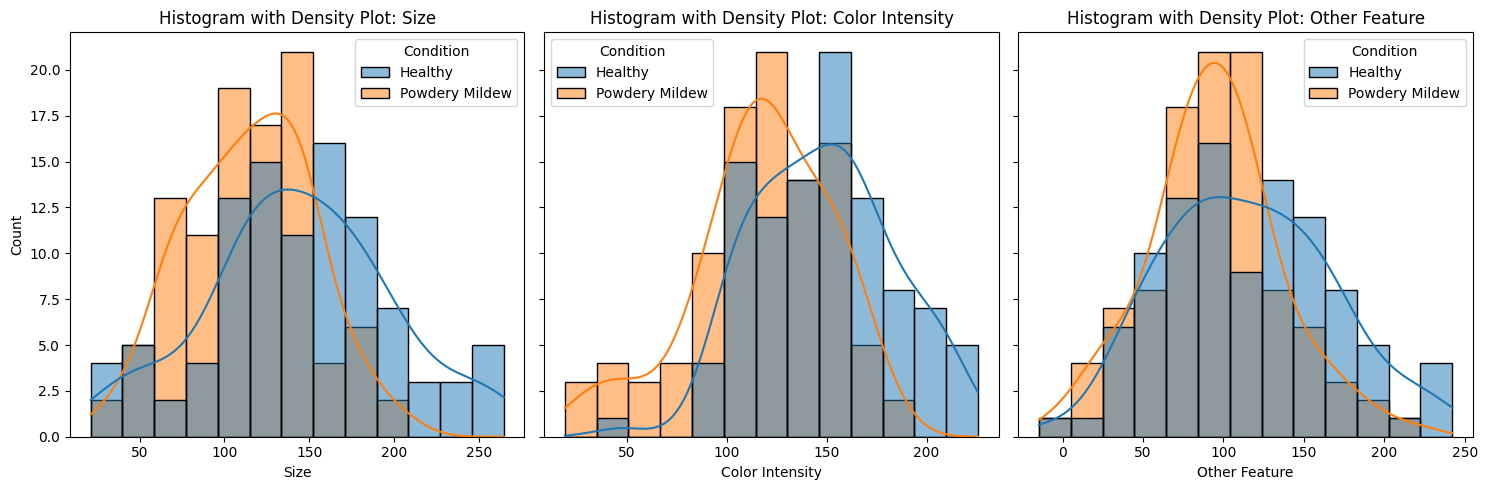

Processing healthy leaf images...


FileNotFoundError: [Errno 2] No such file or directory: './resized_data/healthy'

In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Summary statistics
healthy_mean = np.array([138.65523108, 144.69453251, 121.62613779])
healthy_std = np.array([52.81307405, 35.16307886, 53.32607702])

mildew_mean = np.array([116.11770442, 123.17088945, 103.77318313])
mildew_std = np.array([36.91997604, 34.15072728, 42.99333244])

# Function to perform segmentation and generate heatmap
def segment_leaf(image, threshold_values):
    # Convert image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    
    # Define threshold ranges based on provided mean and standard deviation
    lower_threshold = threshold_values[0] - 2 * threshold_values[1]
    upper_threshold = threshold_values[0] + 2 * threshold_values[1]
    
    # Apply color thresholding to segment leaf
    mask = cv2.inRange(lab_image, lower_threshold, upper_threshold)
    
    return mask

# Generate synthetic data based on normal distribution
np.random.seed(0)
n_samples = 100
healthy_data = np.random.normal(loc=healthy_mean, scale=healthy_std, size=(n_samples, 3))
mildew_data = np.random.normal(loc=mildew_mean, scale=mildew_std, size=(n_samples, 3))

# Create DataFrame
df = pd.DataFrame(np.concatenate([healthy_data, mildew_data]),
                  columns=['Size', 'Color Intensity', 'Other Feature'])
df['Condition'] = ['Healthy'] * n_samples + ['Powdery Mildew'] * n_samples

# Plot histograms overlaid with density plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, feature in enumerate(['Size', 'Color Intensity', 'Other Feature']):
    sns.histplot(data=df, x=feature, hue='Condition', kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with Density Plot: {feature}')
plt.tight_layout()
plt.show()

# Threshold values based on mean and standard deviation
healthy_threshold_values = (healthy_mean, healthy_std)
mildew_threshold_values = (mildew_mean, mildew_std)

# Directories containing leaf images
healthy_dir = './resized_data/healthy'
mildew_dir = './resized_data/powdery_mildew'

# Function to load and process leaf images
def process_images(directory, threshold_values):
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(directory, filename)
            
            # Load leaf image
            leaf_image = cv2.imread(image_path)
            leaf_image_rgb = cv2.cvtColor(leaf_image, cv2.COLOR_BGR2RGB)
            
            # Perform segmentation and generate heatmap
            mask = segment_leaf(leaf_image_rgb, threshold_values)
            
            # Display segmented leaf mask
            plt.figure(figsize=(6, 6))
            plt.imshow(mask, cmap='gray')
            plt.title(f'Segmented Leaf Mask: {filename}')
            plt.axis('off')
            plt.show()

# Process healthy leaf images
print("Processing healthy leaf images...")
process_images(healthy_dir, healthy_threshold_values)

# Process powdery mildew leaf images
print("Processing powdery mildew leaf images...")
process_images(mildew_dir, mildew_threshold_values)


## 7. Heatmap

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to generate heatmap and overlay on leaf image
def generate_heatmap_and_overlay(image_path, heatmap):
    leaf_image = cv2.imread(image_path)
    leaf_image_rgb = cv2.cvtColor(leaf_image, cv2.COLOR_BGR2RGB)

    # Normalize heatmap
    heatmap_normalized = cv2.normalize(heatmap, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Overlay heatmap on leaf image
    alpha = 0.5  # Adjust transparency of heatmap
    overlay = leaf_image_rgb.copy()
    overlay[:, :, 0] = cv2.addWeighted(leaf_image_rgb[:, :, 0], 1 - alpha, heatmap_normalized, alpha, 0)
    overlay[:, :, 1] = cv2.addWeighted(leaf_image_rgb[:, :, 1], 1 - alpha, heatmap_normalized, alpha, 0)
    overlay[:, :, 2] = cv2.addWeighted(leaf_image_rgb[:, :, 2], 1 - alpha, heatmap_normalized, alpha, 0)

    return overlay

# Directories containing leaf images
healthy_dir = './resized_data/healthy'
mildew_dir = './resized_data/powdery_mildew'

# Process healthy leaf images
print("Processing healthy leaf images...")
for filename in os.listdir(healthy_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(healthy_dir, filename)

        # Perform segmentation and generate heatmap (dummy example)
        heatmap = np.random.rand(leaf_image.shape[0], leaf_image.shape[1])  

        # Generate heatmap and overlay on leaf image
        overlaid_image = generate_heatmap_and_overlay(image_path, heatmap)

        # Display overlaid image
        plt.figure(figsize=(10, 10))
        plt.imshow(overlaid_image)
        plt.axis('off')
        plt.title('Overlay of Heatmap on Healthy Leaf Image')
        plt.show()

# Process powdery mildew leaf images
print("Processing powdery mildew leaf images...")
for filename in os.listdir(mildew_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(mildew_dir, filename)

        # Perform segmentation and generate heatmap (dummy example)
        heatmap = np.random.rand(leaf_image.shape[0], leaf_image.shape[1])  

        # Generate heatmap and overlay on leaf image
        overlaid_image = generate_heatmap_and_overlay(image_path, heatmap)

        # Display overlaid image
        plt.figure(figsize=(10, 10))
        plt.imshow(overlaid_image)
        plt.axis('off')
        plt.title('Overlay of Heatmap on Powdery Mildew Leaf Image')
        plt.show()


Processing healthy leaf images...
Processing powdery mildew leaf images...


In [38]:
!cat .gitignore


cat: .gitignore: No such file or directory
